# Sprawozdanie MOWNIT
## laboratorium 2

### Zadanie 1.
### Bisection method
### TODO: set precision

In [220]:
import matplotlib.pyplot as plt
import numpy as np
import math as m

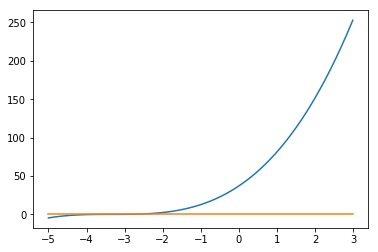

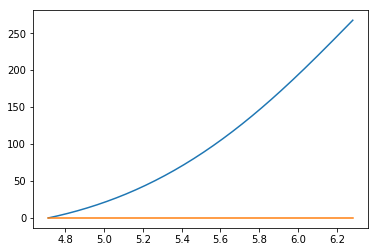

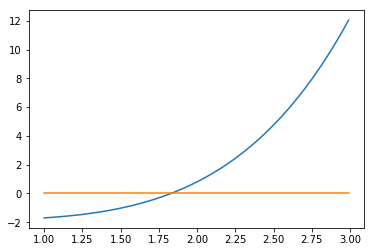

In [221]:
def plot(f, xs):
    ys_f = np.vectorize(lambda x: f(x))
    ys = ys_f(xs)
    plt.plot(xs, ys)
    plt.plot([xs[0], xs[xs.size - 1]], [0, 0])
    plt.show()

# Functions to be tested
def g(x):
    return (x + 3.333)*(x + 3.333)*(x + 3.333)

def f1(x):
    return m.cos(x) * np.cosh(x)

def f2(x):
    return (1 / x) - m.tan(x)
    
def f3(x):
    return 2 ** (-x) + m.exp(x) + 2*m.cos(x) - 6

# plots
plot(g, np.arange(-5.0, 3, 0.01))
plot(f1, np.arange(3 * m.pi / 2, 2 * m.pi, 0.01))
# plot(f2, np.arange(0, m.pi / 2, 0.01))
plot(f3, np.arange(1, 3, 0.01))

In [222]:
def digits(val, n):
    return val

In [223]:
def bisect(f, a, b, eps, max_iters=100, iter_c=0):
    mid = a + (b - a) / 2
    if abs(f(mid)) < eps or iter_c == max_iters or abs(b - a) < eps:
        return (mid, iter_c)
    if f(mid) < 0:
        res, iters = bisect(f, mid, b, eps, iter_c + 1)
        return (res, iters + 1)
    else:
        res, iters = bisect(f, a, mid, eps, iter_c + 1)
        return (res, iters + 1)

In [224]:
res, iters = bisect(f1, 3*m.pi/2, m.pi*2, 0.00000001)
print(res, iters)
print(f1(res))

4.712388983310525 28
1.6286189022e-07


### Zadanie 2
### Newton's method

In [225]:
def df(f, x, h=0.0001):
    return (f(x + h) - f(x)) / h
 
def newtons_roots(f, x0, eps, itermax=100):
    iter_c = 0
    while abs(f(x0)) > eps and iter_c < itermax:
        x0 = x0 - f(x0) / df(f, x0)
        delta = abs(f(x0))
        iter_c += 1
    if iter_c + 1 == itermax:
        print("stopped by iteration limit")
    return (x0, iter_c)

In [226]:
newtons_roots(f1, 3.4, 0.0000000001)

(1.5707963267982139, 6)

## Zadanie 3

In [227]:
def siecznych_method(f, a, b, eps, max_iters=100, iters=0):
    x0 = a - f(a) * (a - b) / (f(a) - f(b))
#     print("iters: ", iters, x0)
    if abs(f(x0)) < eps or iters == max_iters:
        return x0, iters
    return siecznych_method(f, x0, a, eps, max_iters, iters + 1)

In [233]:
res1, iter1 = bisect(f1, 3*m.pi/2, m.pi*2, 0.00000001)
res2, iter2 = newtons_roots(f1, (3*m.pi/2 + m.pi*2) / 2, 0.0000000001)
res3, iter3 = siecznych_method(f1, 3*m.pi/2, m.pi*2, 0.0000000001)
print("Bisect: ", res1, iter1, f1(res1))
print("Newtons: ", res2, iter2, f1(res2))
print("siecznych: ", res3, iter3, f1(res3))

res11, iter11 = bisect(f2, 0, m.pi/2, 0.00000001)
res22, iter22 = newtons_roots(f2, m.pi / 4, 0.0000000001)
res33, iter33 = siecznych_method(f2, 0.01, m.pi/2, 0.0000000001)
print("Bisect: ", res11, iter11, f2(res11))
print("Newtons: ", res22, iter22, f2(res22))
print("siecznych: ", res33, iter33, f2(res33))

res111, iter111 = bisect(f3, 1, 3, 0.00000001)
res222, iter222 = newtons_roots(f3, 2, 0.0000000001)
res333, iter333 = siecznych_method(f3, 1, 3, 0.0000000001)
print("Bisect: ", res111, iter111, f3(res111))
print("Newtons: ", res222, iter222, f3(res222))
print("siecznych: ", res333, iter333, f3(res333))

Bisect:  4.712388983310525 28 1.6286189022e-07
Newtons:  4.71238898038 6 6.41684658049e-12
siecznych:  4.71238898038 0 -1.02251971856e-14
Bisect:  2.9258361585343192e-09 28 341782637.7882158
Newtons:  0.8603335890225966 3 -1.1908918295944204e-11
siecznych:  0.8603335890193798 14 0.0
Bisect:  1.8293836042284966 27 9.411497359224086e-09
Newtons:  1.8293836019460663 4 5.0110138261061365e-11
siecznych:  1.829383601933764 9 -3.490541189421492e-13
